## Import required library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Load data

In [2]:
data = pd.read_csv("D:\\Files\\ML-2\\Data Science\\Decision Trees\\Data\\credit.csv")

In [3]:
data.shape

(1000, 21)

In [4]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,1
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,2
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,skilled employee,2,none,yes,1
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,skilled employee,2,none,yes,2


## Data Analyzing


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
job                     1000 non-null object
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
d

In [6]:
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_length       0
installment_rate        0
personal_status         0
other_debtors           0
residence_history       0
property                0
age                     0
installment_plan        0
housing                 0
existing_credits        0
job                     0
dependents              0
telephone               0
foreign_worker          0
default                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE767BA630>,
      dtype=object)

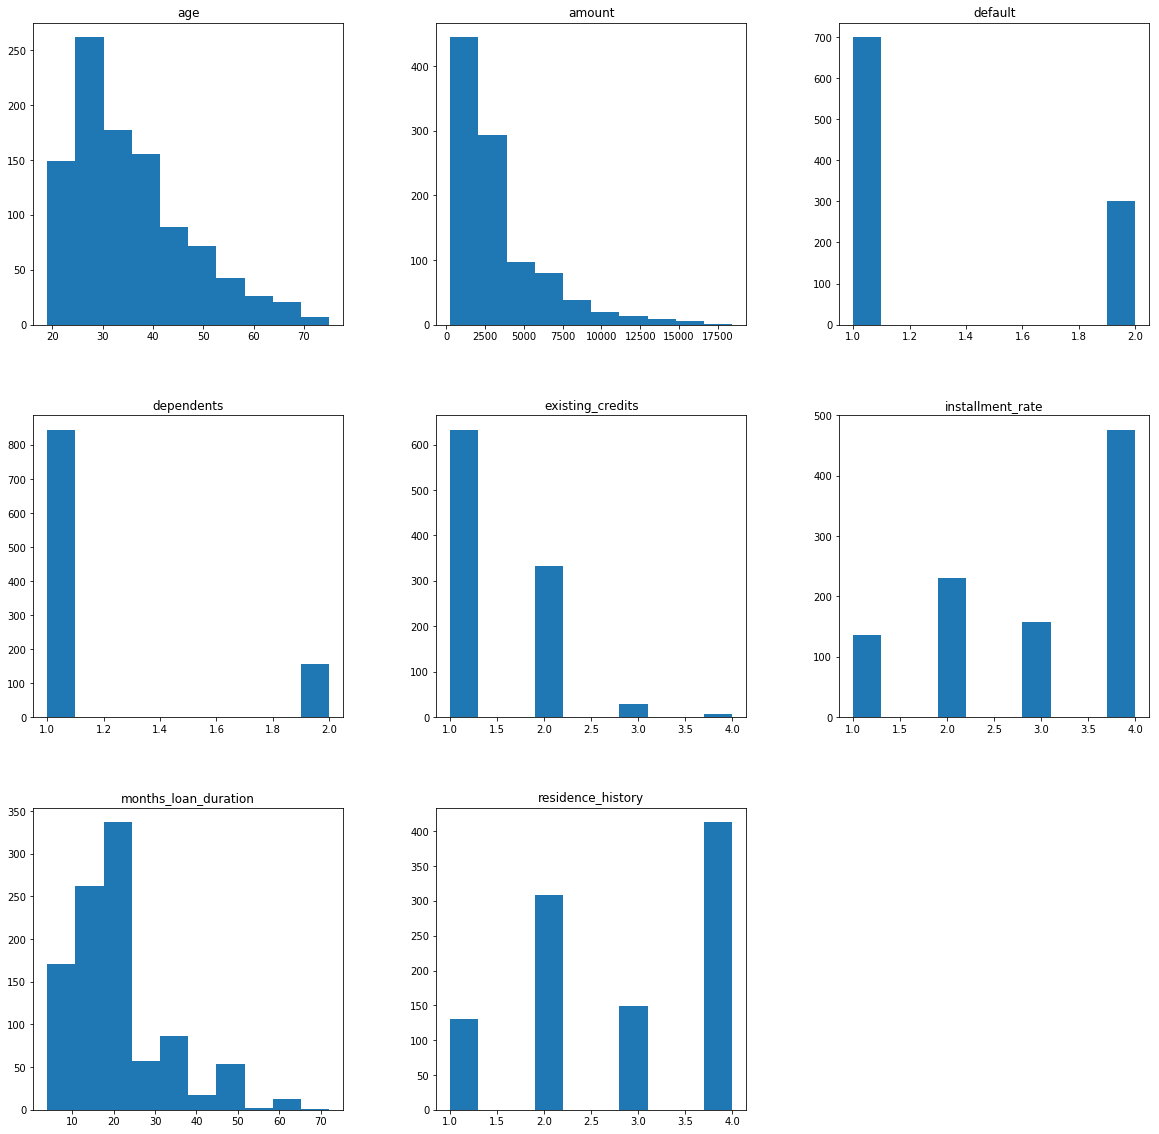

In [7]:
data.hist(bins = 10, figsize = (20, 20), grid = False)

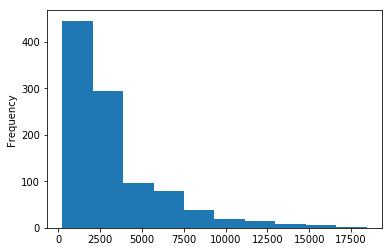

In [8]:
data.amount.plot.hist()

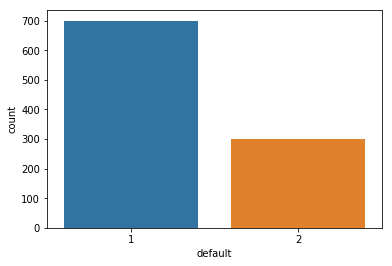

In [9]:
sb.countplot(x = 'default', data = data)

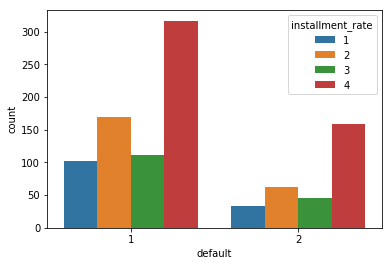

In [10]:
sb.countplot(x = 'default', hue = 'installment_rate', data = data)

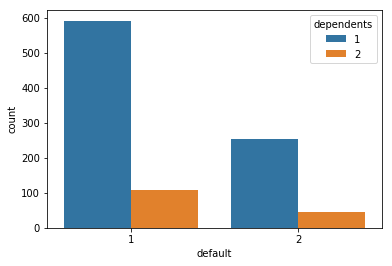

In [11]:
sb.countplot(x = 'default', hue = 'dependents', data = data)

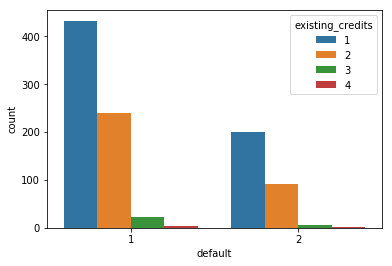

In [12]:
sb.countplot(x = 'default', hue = 'existing_credits', data = data)

## Data cleaning

In [15]:
numVar = data[['months_loan_duration', 'amount', 'installment_rate', 'residence_history', 'age', 'existing_credits', 'dependents', 'default']
]
catVar = data[['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_length', 'personal_status', 'other_debtors', 'property', 'installment_plan', 'housing', 'job', 'telephone', 'foreign_worker']]

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
catVar = catVar.apply(LabelEncoder().fit_transform)

In [18]:
data = pd.concat([numVar, catVar.reset_index(drop = True)], axis = 1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
months_loan_duration    1000 non-null int64
amount                  1000 non-null int64
installment_rate        1000 non-null int64
residence_history       1000 non-null int64
age                     1000 non-null int64
existing_credits        1000 non-null int64
dependents              1000 non-null int64
default                 1000 non-null int64
checking_balance        1000 non-null int32
credit_history          1000 non-null int32
purpose                 1000 non-null int32
savings_balance         1000 non-null int32
employment_length       1000 non-null int32
personal_status         1000 non-null int32
other_debtors           1000 non-null int32
property                1000 non-null int32
installment_plan        1000 non-null int32
housing                 1000 non-null int32
job                     1000 non-null int32
telephone               1000 non-null int32
foreign_worker

## Split data into test and train

In [20]:
X = data.drop('default', axis = 1)
y = data.default

In [21]:
print(X.head(2))
print("\n\n")
print(y.head(2))

   months_loan_duration  amount  installment_rate  residence_history  age  \
0                     6    1169                 4                  4   67   
1                    48    5951                 2                  2   22   

   existing_credits  dependents  checking_balance  credit_history  purpose  \
0                 2           1                 1               0        7   
1                 1           1                 0               4        7   

   savings_balance  employment_length  personal_status  other_debtors  \
0                4                  3                3              2   
1                2                  1                1              2   

   property  installment_plan  housing  job  telephone  foreign_worker  
0         2                 1        1    1          1               1  
1         2                 1        1    1          0               1  



0    1
1    2
Name: default, dtype: int64


In [22]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.3)

## Train the Classifier and Predict

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
DTModel = DecisionTreeClassifier()

In [54]:
DTModelFit = DTModel.fit(X_train, y_train)

In [55]:
DTModelPredict = DTModelFit.predict(X_test)

## Evaluation

### Classification Report

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(y_test, DTModelPredict))

              precision    recall  f1-score   support

           1       0.77      0.76      0.77       207
           2       0.48      0.48      0.48        93

   micro avg       0.68      0.68      0.68       300
   macro avg       0.62      0.62      0.62       300
weighted avg       0.68      0.68      0.68       300



### Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
print(confusion_matrix(y_test, DTModelPredict))

[[158  49]
 [ 48  45]]


### Accuracy


In [60]:
from sklearn.metrics import accuracy_score

In [61]:
print(accuracy_score(y_test, DTModelPredict))

0.6766666666666666
